In [12]:
import pandas as pd
import numpy as np
import jieba 
from collections import Counter

In [13]:
def get_index(lst=None, item=''):
    return [i for i in range(len(lst)) if lst[i] == item] 
with open("stoplist.txt", encoding="utf-8-sig") as f:#打开停用词
    stop_words = f.read().split()
stop_words = set(stop_words)
with open('content_1673171156399.txt',encoding='utf-8') as f:#打开文件
    number={}
    a=[]
    b=[]
    c=[]
    for line in f.readlines():
        if line.startswith('作者'):
            line=line.replace('作者:','')#将作者字符添加到列表
            line=line.strip()
            a.append(line)
        if line.startswith('诗体'):
            line=line.replace('诗体:','')#将诗体字符添加到列表
            line=line.strip()
            b.append(line)
        if line.startswith('诗文'):
            line=line.replace('诗文:','')#将诗文字符添加到列表
            count1=jieba.lcut(line[6:])
            word_count={}
            for word in count1:
                print(word)
                if word not in stop_words and '\n'!= word and len(word)>1 and '押韵'not in word:
                    word_count[word] = word_count.get(word, 0) + 1
            items = list(word_count.items())
            c.append(word_count)
count=Counter(a)
print(sorted(count.items(),key= lambda x:x[1],reverse=True))
d=[]
for i in set(a):
    e={}
    index=get_index(a,i)
    for j in index:
        e.update(c[j])
    d.append((i,sorted(e.items(),key=lambda x:x[1],reverse=True)[0][0]))#生成每个诗人的最高频率词
print(d)
f=[]
for i in set(b):
    e={}
    index=get_index(b,i)
    for j in index:
        e.update(c[j])
    f.append((i,sorted(e.items(),key=lambda x:x[1],reverse=True)[0][0]))#生成每个诗的类型的最高频率词汇
print(f)

In [49]:
d=[]
for i in set(a):
    e={}
    index=get_index(a,i)
    for j in index:
        e.update(c[j])
    d.append((i,sorted(e.items(),key=lambda x:x[1],reverse=True)[0][0]))#生成每个诗人的最高频率词

In [50]:
d

[('张祜', '三千里'),
 ('陈陶', '匈奴'),
 ('王之涣', '日依山'),
 ('元结', '山林'),
 ('柳中庸', '金河'),
 ('刘方平', '月色'),
 ('贺知章', '离家'),
 ('刘禹锡', '英雄'),
 ('孟郊', '鸳鸯'),
 ('戴叔伦', '秋月'),
 ('韩翃', '迎风'),
 ('许浑', '叶晚'),
 ('李频', '外音'),
 ('皇甫冉', '燕语'),
 ('王勃', '阙辅'),
 ('韩偓', '阑干'),
 ('元稹', '最小'),
 ('杜荀鹤', '婵娟'),
 ('韦庄', '瑟怨'),
 ('刘慎虚', '白云'),
 ('无名氏', '寒食'),
 ('王建', '入厨'),
 ('马戴', '风雨'),
 ('祖咏', '台一去'),
 ('邱为', '直上'),
 ('金昌绪', '黄莺儿'),
 ('李端', '金粟柱'),
 ('温庭筠', '戍落'),
 ('贾岛', '童子'),
 ('柳宗元', '清心'),
 ('裴迪', '深浅'),
 ('韩愈', '石鼓'),
 ('西鄙人', '七星'),
 ('崔颢', '黄鹤'),
 ('司空曙', '江海'),
 ('宋之问', '南飞雁'),
 ('张乔', '角断'),
 ('杜牧', '良伴'),
 ('白居易', '君王'),
 ('崔曙', '皇帝'),
 ('权德舆', '裙带'),
 ('僧皎然', '虽带'),
 ('张继', '乌啼霜'),
 ('杜审言', '宦游'),
 ('秦韬玉', '门未识'),
 ('岑参', '高耸'),
 ('张泌', '依依'),
 ('李颀', '少小'),
 ('王昌龄', '月初'),
 ('唐玄宗', '何为'),
 ('刘长卿', '台摇'),
 ('薛逢', '二楼'),
 ('陈子昂', '后不见来者'),
 ('张旭', '飞桥'),
 ('骆宾王', '蝉声'),
 ('朱庆余', '寂花'),
 ('李益', '离乱'),
 ('李白', '庐山'),
 ('郑畋', '宗回马'),
 ('顾况', '楼天'),
 ('崔涂', '递三巴路'),
 ('王湾', '青山'),
 ('高适', '汉将'),
 ('常建', '隐处'),

In [53]:
f=[]
for i in set(b):
    e={}
    index=get_index(b,i)
    for j in index:
        e.update(c[j])
    f.append((i,sorted(e.items(),key=lambda x:x[1],reverse=True)[0][0]))#生成每个诗的类型的最高频率词汇
        

In [54]:
f

[('五言律诗', '阙辅'),
 ('七言律诗', '蓬山'),
 ('七言古诗', '君王'),
 ('乐府', '王孙'),
 ('五言古诗', '新人'),
 ('五言绝句', '落古'),
 ('七言绝句', '巴山夜雨')]

In [425]:
import matplotlib.pyplot as plt
df=pd.read_csv('深圳一卡通刷卡数据\shenzhenkatong1.csv')
df1=pd.read_csv('深圳一卡通刷卡数据\shenzhenkatong2.csv')
plt.rcParams['font.sans-serif'] = ['SimHei']
#导入数据
df_all=pd.concat([df,df1])#数据按时间合并
df_all.isna().value_counts()#显示各列缺失值
df_all.dropna(subset='car_no',inplace=True)#删除car_no
df_all['deal_date']=df_all['deal_date'].apply(lambda x:'2018/9/1 '+x[9:]+':00')

df_all['deal_date']=pd.to_datetime(df_all['deal_date'])#对时间序列进行格式转化。
df_all=df_all.sort_values('deal_date').reset_index(drop=True)
print(df_all)
df_all=df_all.set_index('deal_date',drop=False).sort_index()
a=df_all['deal_date'].value_counts()
a=a.sort_index()#对数据按时间进行从小到大排序

plt.plot(a.index,a)#绘制整体人流量曲线图
plt.show()

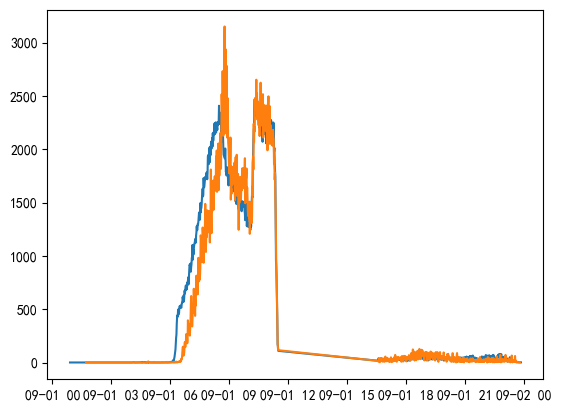

In [435]:
q=df_all.groupby('deal_type')['deal_date'].value_counts()
plt.plot(q['地铁入站'].sort_index().index,q['地铁入站'].sort_index())
plt.plot(q['地铁出站'].sort_index().index,q['地铁出站'].sort_index())#绘制不同线路勾勒出曲线图

['黄木岗' '长龙' '民乐' '龙华' '红岭北' '太安' '上沙' '永湖' '丹竹头' '下水径']


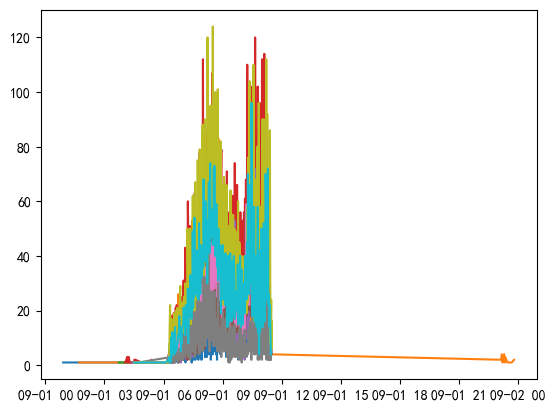

In [436]:
r=df_all.groupby('station')['deal_date'].value_counts()
for i in df_all['station'].unique()[:10]:
    plt.plot(r[i].sort_index().index,r[i].sort_index())
print(df_all['station'].unique()[:10])#绘制不同站点勾勒出曲线图
    
 

In [384]:
len(df_all['station'].unique())

170